In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import wbgapi as wb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.preprocessing import normalize

## Clustering (K-Means)

In [2]:
"creating a function for data normalization"
def normlz(data):
    nm=normalize(data)
    return nm

In [3]:
cc = ['TUR','CHN','ISR','MLI','NGA']
ind1=["EN.ATM.CO2E.KT"]
ind1mn=['C02 Emission']
ind2=["EG.ELC.COAL.ZS"]
ind2mn=['Electricity production from coal source']

In [4]:
my_dataframe1  = wb.data.DataFrame(ind1, cc, mrv=50).T
my_dataframe1=my_dataframe1.fillna(my_dataframe1.mean())
my_dataframe1.head()

economy,CHN,ISR,MLI,NGA,TUR
YR1990,2173360.0,33800.0,420.0,67850.0,139220.0
YR1991,2302190.0,34520.0,430.0,75570.0,143820.0
YR1992,2418180.0,36860.0,450.0,86400.0,149830.0
YR1993,2643530.0,40500.0,460.0,84410.0,155630.0
YR1994,2763900.0,43360.0,470.0,80530.0,153930.0


In [5]:
my_dataframe2  = wb.data.DataFrame(ind2, cc, mrv=50).T
my_dataframe2=my_dataframe2.fillna(my_dataframe2.mean())
my_dataframe2.head()

economy,CHN,ISR,MLI,NGA,TUR
YR1966,69.395596,44.813478,NaN,0.156269,47.126644
YR1967,69.395596,44.813478,NaN,0.156269,34.165191
YR1968,69.395596,44.813478,NaN,0.156269,32.194348
YR1969,69.395596,44.813478,NaN,0.156269,30.607298
YR1970,69.395596,44.813478,NaN,0.156269,32.749623


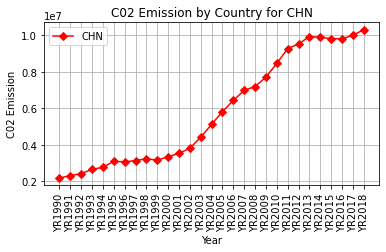

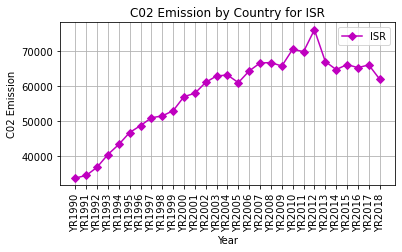

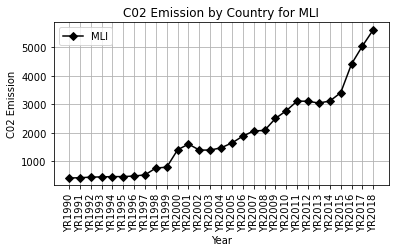

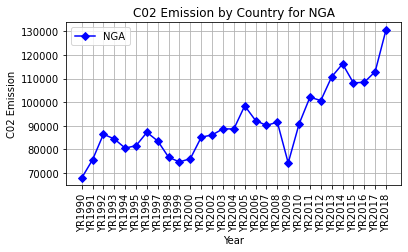

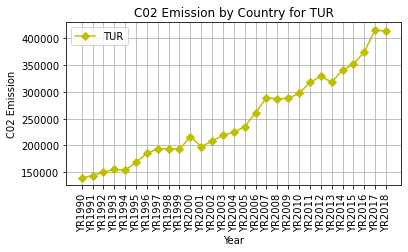

In [42]:
clmns=my_dataframe1.columns
clrs="rmkby"
for i in range(len(clmns)):
    plt.figure(figsize=(6,3))
    plt.title('C02 Emission by Country for {}'.format(clmns[i]))
    plt.plot(my_dataframe1[clmns[i]],"{}D-".format(clrs[i]),label=clmns[i])
    plt.xlabel("Year")
    plt.xticks(rotation=90)
    plt.ylabel("C02 Emission")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

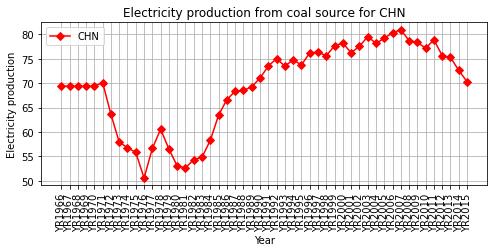

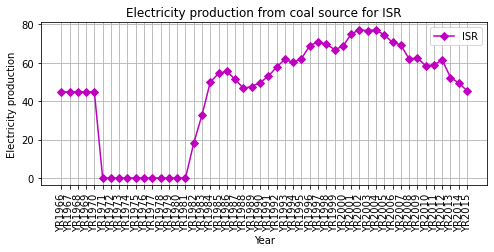

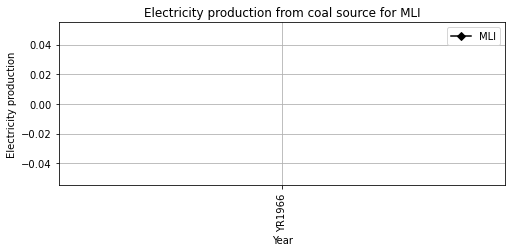

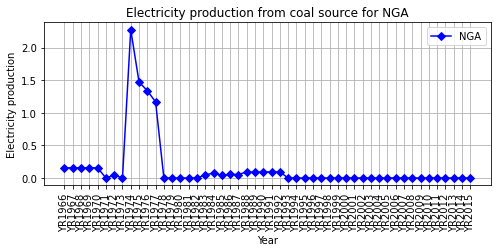

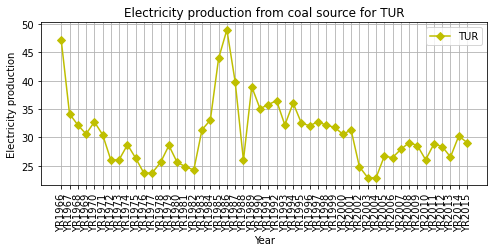

In [44]:
for i in range(len(clmns)):
    plt.figure(figsize=(8,3))
    plt.title('Electricity production from coal source for {}'.format(clmns[i]))
    plt.plot(my_dataframe2[clmns[i]],"{}D-".format(clrs[i]),label=clmns[i])
    plt.xlabel("Year")
    plt.xticks(rotation=90)
    plt.ylabel("Electricity production")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

In [8]:
data=normlz(my_dataframe1.values)

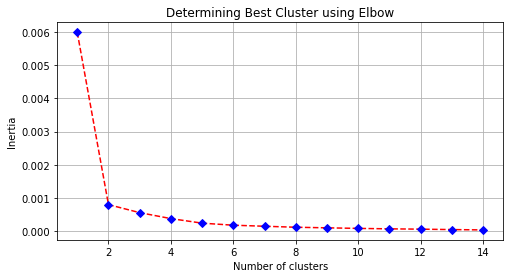

In [45]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300,  random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,4))
plt.title('Determining Best Cluster using Elbow')
plt.plot(range(1, 15), wcss,"r--")
plt.plot(range(1, 15), wcss,"Db")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [47]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
model = kmeans.fit(data)

In [48]:
model.cluster_centers_

array([[9.98112763e-01, 1.54844638e-02, 2.92203706e-04, 2.44367526e-02,
        5.40222765e-02],
       [9.99293432e-01, 7.37052760e-03, 3.41697763e-04, 1.08464235e-02,
        3.51630974e-02],
       [9.97435784e-01, 1.52382415e-02, 1.84556728e-04, 3.28415722e-02,
        6.16812933e-02],
       [9.97653916e-01, 1.63600980e-02, 2.48049011e-04, 2.50039206e-02,
        6.15315185e-02],
       [9.99011620e-01, 9.16426509e-03, 3.57089929e-04, 1.40026200e-02,
        4.10529950e-02]])

In [49]:
cntry=[]
for i in model.labels_:
    if i==0:
        cntry.append(clmns[0])
    elif i==1:
        cntry.append(clmns[1])
    elif i==2:
        cntry.append(clmns[2])
    elif i==3:
        cntry.append(clmns[3])
    elif i==4:
        cntry.append(clmns[4])

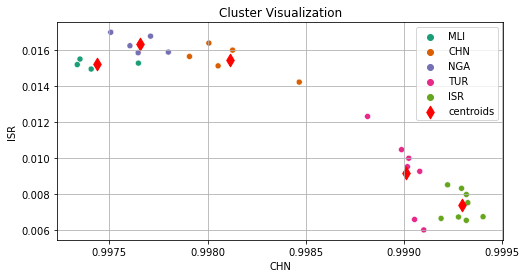

In [50]:
df=pd.DataFrame(data,columns=my_dataframe1.columns)
plt.figure(figsize=(8,4))
plt.title('Cluster Visualization')
sns.scatterplot(data=df, x=clmns[0], y=clmns[1], hue=cntry,palette="Dark2")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="d", c="r", s=80, label="centroids")
plt.grid()
plt.legend()
plt.show()

## Curve Fitting

In [14]:
from scipy.optimize import curve_fit
#!pip install lmfit
from lmfit import Model

In [15]:
def gaussian(x, amp, cen, wid):
    return (amp / (np.sqrt(2*np.pi) * wid)) * np.exp(-(x-cen)**2 / (2*wid**2))

In [32]:
norml2 = normlz(my_dataframe2.iloc[:,[0,1,3,4]].values)
y = gaussian(norml2[:,1], 2.1, 0.5, 1.51) + np.random.normal(0, 0.2, norml2.shape[0])
init_vals = [1, 0, 1] 
best_vals, covar = curve_fit(gaussian, norml2[:,1], y, p0=init_vals,maxfev = 2000)
gmodel = Model(gaussian)

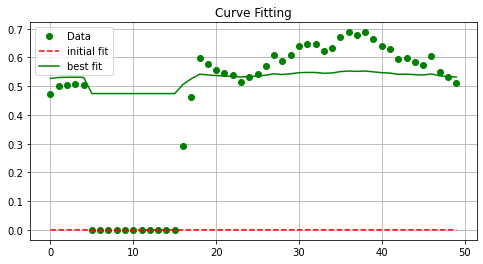

In [51]:
result = gmodel.fit(y, x=norml2[:,1], amp=5, cen=5, wid=1)
plt.figure(figsize=(8,4))
plt.title('Curve Fitting')
plt.plot(norml2[:,1],"go",label="Data")
plt.plot(result.init_fit, 'r--', label='initial fit')
plt.plot(result.best_fit, 'g-', label='best fit')
plt.legend()
plt.grid()
plt.show()

In [34]:
result